# Matplotlib

Matplotlib es una librería de visualización para python. Es probablemente una de las librerías a más bajo nivel, lo que nos permite personalizar nuestros gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Lección 1 - Mi primer gráfico

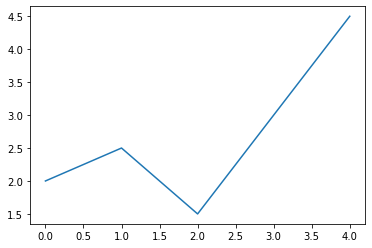

In [2]:
x = np.arange(5)
y = np.array([2.0, 2.5, 1.5, 3.0, 4.5])

plt.plot(x, y)

Podemos cambiar el tipo de gráfico. Tenemos todos los tipos al final de la ayuda.

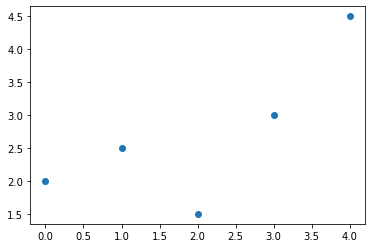

In [3]:
plt.plot(x, y, 'o')

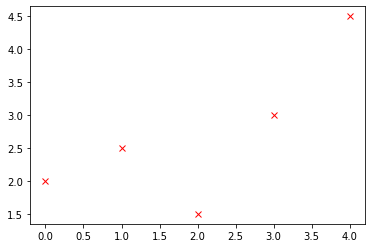

In [4]:
x = np.arange(5)
y = np.array([2.0, 2.5, 1.5, 3.0, 4.5])

plt.plot(x, y, 'xr')

Una vez hemos visto varios tipos de gráficos simples, veamos como podemos pintar varios gráficos en el mismo plot.

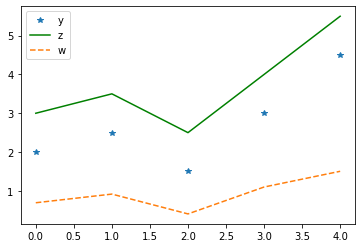

In [5]:
z = y + 1
w = np.log(y)

plt.plot(x, y, '*', label = 'y')
plt.plot(x, z, 'g-', label = 'z')
plt.plot(x, w, '--', label = 'w')
plt.legend()

Ahora, vamos a poner nuestros gráficos un poco más bonitos ;)

Text(0, 0.5, 'Eje y')

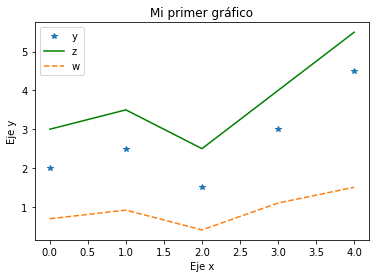

In [6]:
z = y + 1
w = np.log(y)

plt.plot(x, y, '*', label = 'y')
plt.plot(x, z, 'g-', label = 'z')
plt.plot(x, w, '--', label = 'w')
plt.legend()
plt.title('Mi primer gráfico')
plt.xlabel('Eje x')
plt.ylabel('Eje y')

Text(0, 0.5, 'Eje y')

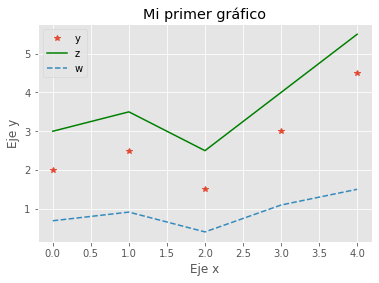

In [7]:
import matplotlib.style as mplstyle

mplstyle.use('ggplot') # dark_background, fast

z = y + 1
w = np.log(y)

plt.plot(x, y, '*', label = 'y')
plt.plot(x, z, 'g-', label = 'z')
plt.plot(x, w, '--', label = 'w')
plt.legend()
plt.title('Mi primer gráfico')
plt.xlabel('Eje x')
plt.ylabel('Eje y')

In [8]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


## Lección 2 - Gráficos básicos I

En esta lección vamos a comenzar a conocer algunos de los tipos de gráficos más usados, y como implementarlos con matplotlib.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('./data')

%matplotlib inline

Cuando trabajamos con matplotlib, es habitual el uso del método *subplots* para la generación de 2 objetos:
- Un objeto tipo Figure
- Un objeto tipo Axes

Aunque profundizaremos más en en este método, comencemos usándolo.

In [10]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Gráfico de lineas

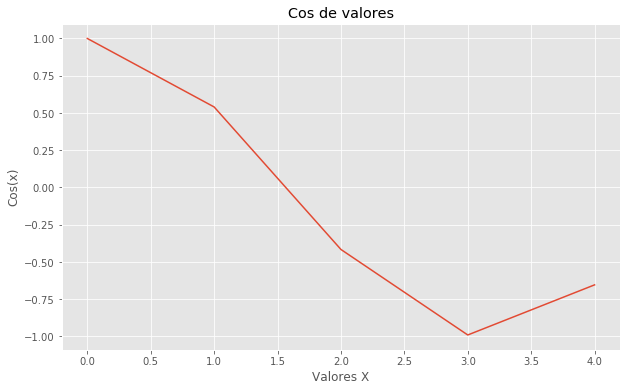

In [11]:
fig, ax = plt.subplots(figsize = (10,6))

x = np.arange(5)
y = np.cos(x)

ax.plot(x, y)
ax.set(xlabel = 'Valores X', ylabel = 'Cos(x)', title = 'Cos de valores');

### Gráfico de barras

In [12]:
num_by_bathrooms = data.groupby('bedrooms')['price'].count()
num_by_bathrooms

bedrooms
0.0       2
1.0      38
2.0     566
3.0    2032
4.0    1531
5.0     353
6.0      61
7.0      14
8.0       2
9.0       1
Name: price, dtype: int64

Text(0, 0.5, 'Numero de filas')

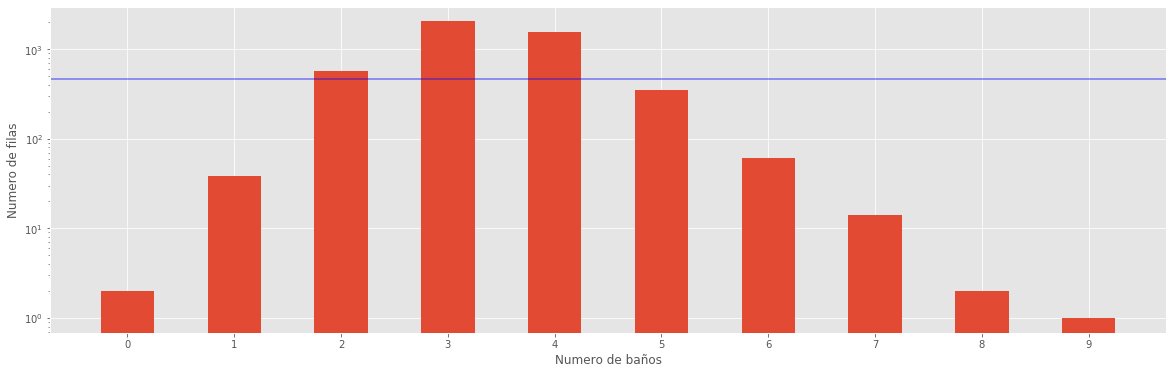

In [13]:
fig, ax = plt.subplots(figsize = (20, 6))

ax.bar(x = num_by_bathrooms.index.values, height=num_by_bathrooms.values, width = 0.5, align='center')
ax.axhline(num_by_bathrooms.mean(), color = 'blue', alpha = .5)

ax.set_xticks(num_by_bathrooms.index.values)
ax.set_yscale('log') # linear

ax.set_xlabel('Numero de baños')
ax.set_ylabel('Numero de filas')

### Histograma

Text(0.5, 1.0, 'Histograma de precio')

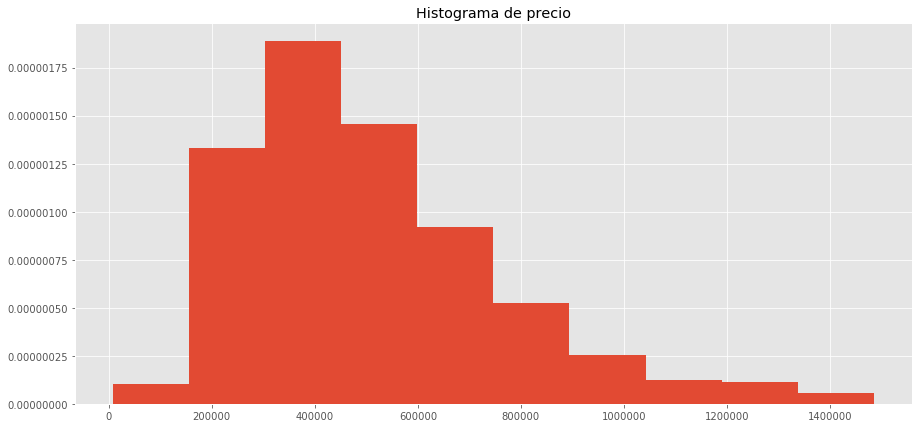

In [14]:
price = data.query('price > 0 and price < 1_500_000')['price']

fig, ax = plt.subplots(figsize = (15, 7))

ax.hist(price, bins=10, density=True)
ax.set_title('Histograma de precio')



### Gráfico de puntos

In [15]:
data['condition'].unique()

array([3, 5, 4, 2, 1])

Text(0, 0.5, 'sqft_living')

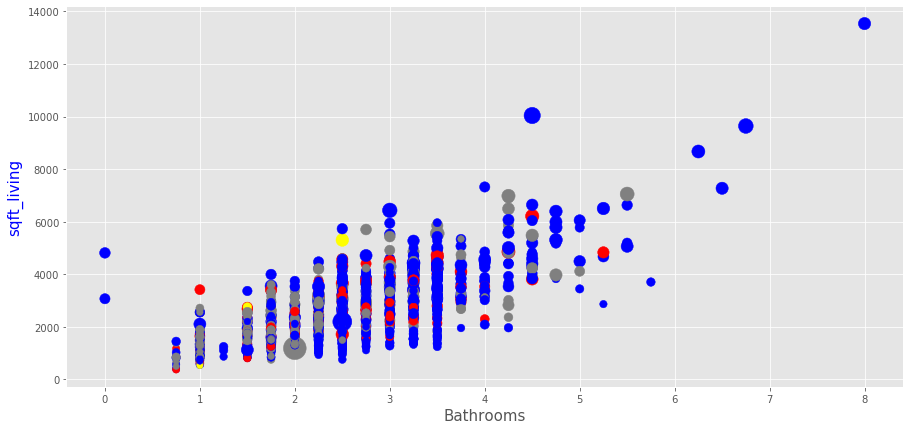

In [16]:
fig, ax = plt.subplots(figsize = (15, 7))

x = data['bathrooms']
y = data['sqft_living']

vol = np.sqrt(data['price'])/10

colors = ["", "green", "yellow", "blue", "gray", "red"]

ax.scatter(x = x, y = y, s = vol, c = data['condition'].apply(lambda x: colors[x]))

ax.set_xlabel('Bathrooms', fontsize = 15)
ax.set_ylabel('sqft_living', c = 'blue', fontsize = 15)

## Lección 3 - Gráficos básicos II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('./data')

%matplotlib inline

In [2]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Gráfico de tartas

In [3]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')
vc = cities['city'].value_counts(normalize = True)
vc

Seattle     0.611111
Renton      0.113831
Bellevue    0.111111
Redmond     0.091298
Issaquah    0.072650
Name: city, dtype: float64

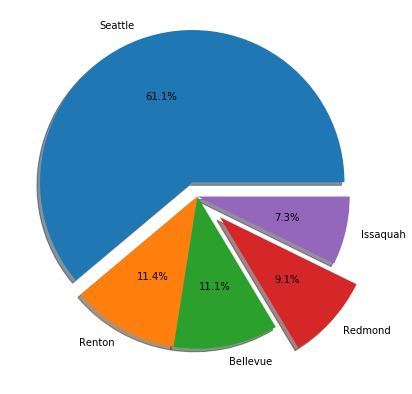

In [4]:
fig, ax = plt.subplots(figsize = (15, 7))

explode = [0.1, 0, 0, 0.2, 0]
ax.pie(vc, labels=vc.index, explode=explode, shadow = True, autopct='%1.1f%%', startangle=0, );

### Gráfico de tablas

In [5]:
df = data.query('condition in (2,3,4) and bedrooms in (1,2,3)')
_ = df.pivot_table(index = 'condition', columns = 'bedrooms', values = 'price', aggfunc=np.count_nonzero)
_

bedrooms,1.0,2.0,3.0
condition,,,
2,4.0,11.0,9.0
3,23.0,340.0,1248.0
4,6.0,155.0,587.0


In [6]:
price_mean = df.groupby('bedrooms')['price'].mean()
price_mean

bedrooms
1.0    270825.000000
2.0    384626.305381
3.0    481533.162858
Name: price, dtype: float64

Text(0, 0.5, 'Precio medio segun nº baños')

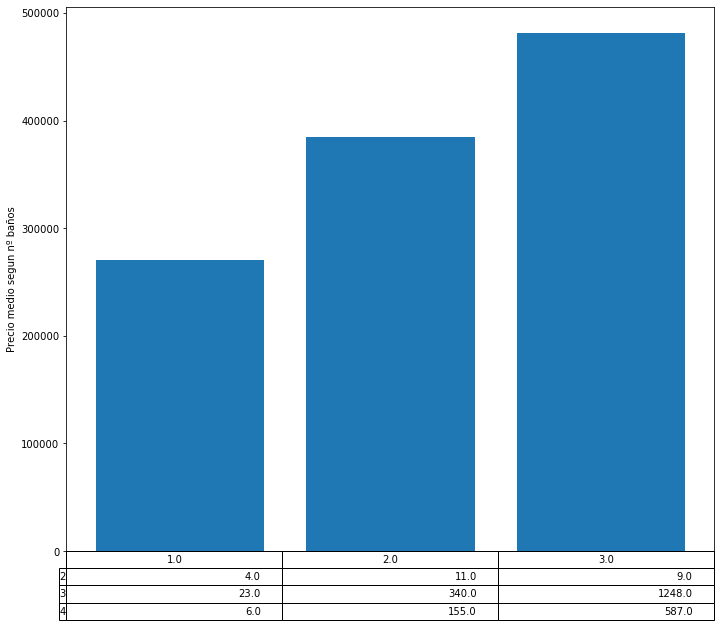

In [7]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(x = price_mean.index, height=price_mean.values)
ax.table(_.values, loc='bottom', rowLabels=_.index.values, colLabels=_.columns.values)

plt.subplots_adjust(left=0, bottom=-.2)
plt.xticks([])

plt.ylabel('Precio medio segun nº baños')

### Mapa de calor

In [8]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


### Gráfico de colores - Mapa de calor

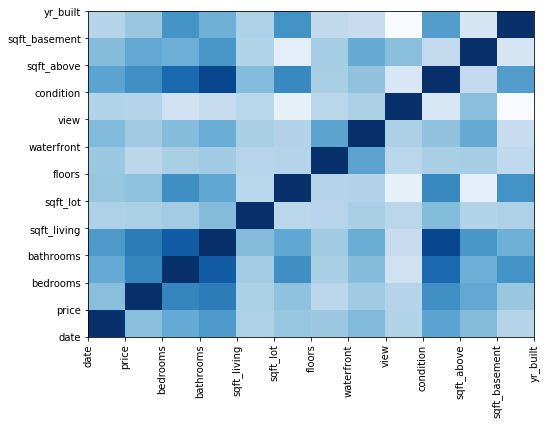

In [9]:
fig, ax = plt.subplots(figsize = (8,6))

ax.pcolormesh(np.arange(13), np.arange(13), data.corr().values, cmap = 'Blues')

plt.xticks(np.arange(13), data.columns, rotation = 'vertical');
plt.yticks(np.arange(13), data.columns, rotation = 'horizontal');

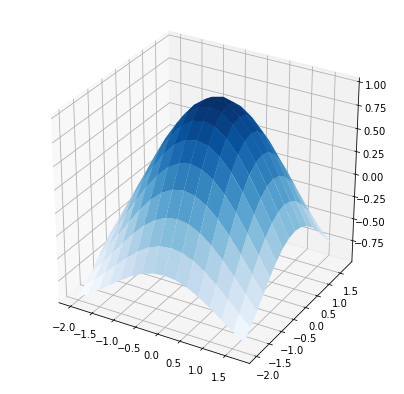

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7,7))
ax = fig.gca(projection='3d')

# Generamos los datos
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

surf = ax.plot_surface(X, Y, Z, cmap='Blues')

## Lección 4 - Subplots

Es muy habitual el hecho de tener que representar varios gráficos en la misma figura. Veamos como podemos hacerlo con matplotlib.

### Gráficos distintos en el mismo eje (ax)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('./data')

%matplotlib inline

In [27]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [43]:
data['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Clyde Hill               11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

In [28]:
agrup = data.groupby('condition').agg({
    'sqft_living' : 'mean',
    'sqft_lot' : 'mean'
})
agrup

,sqft_living,sqft_lot
condition,,
1,1325.000000,19718.000000
2,1526.875000,39597.812500
3,2218.987478,14164.930783
4,1986.699681,15969.862620
5,2108.618391,14293.544828


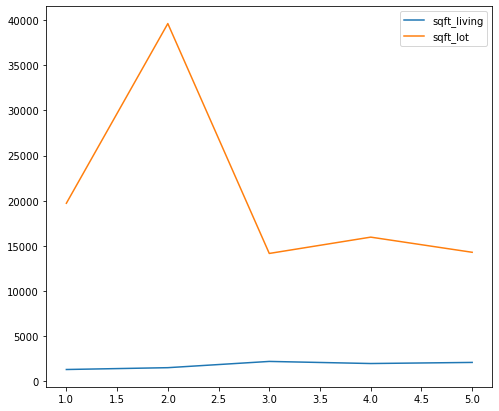

In [31]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living')
ax.plot(agrup['sqft_lot'], label = 'sqft_lot')

ax.legend()

¿Qué ocurre si las magnitudes son distintas? Es dificil interpretar la línea azul, puesto la línea naranja tiene dominio de la variable mucho mayor. Para ello, podemos crear un eje en el lado derecho.

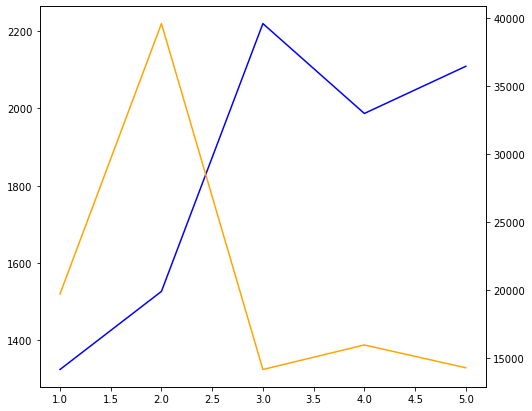

In [38]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

Ahora, vamos a ver como crear distintos subgráficos. En concreto, vamos a crear gráficos que muestren el precio medio según la variable 'condition' por cada ciudad. Es decir, tendremos un primer gráfico con el precio medio de la ciudad Seattle, luego otro para Renton, y así sucesivamente.

In [51]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')

agr = cities.groupby(['city', 'condition'])['price'].mean().unstack().T
agr.fillna(0, inplace = True)
agr

city,Bellevue,Issaquah,Redmond,Renton,Seattle
condition,,,,,
1,365000.000000,0.000000,550000.000000,0.000000,341000.000000
2,0.000000,0.000000,170000.000000,427000.000000,427080.000000
3,964193.383451,619677.918680,690890.027797,411158.779352,543221.769090
4,713819.653623,517070.750000,598745.377841,307572.165123,592722.333256
5,818712.464286,587137.555556,825000.000000,342921.866667,721616.962702


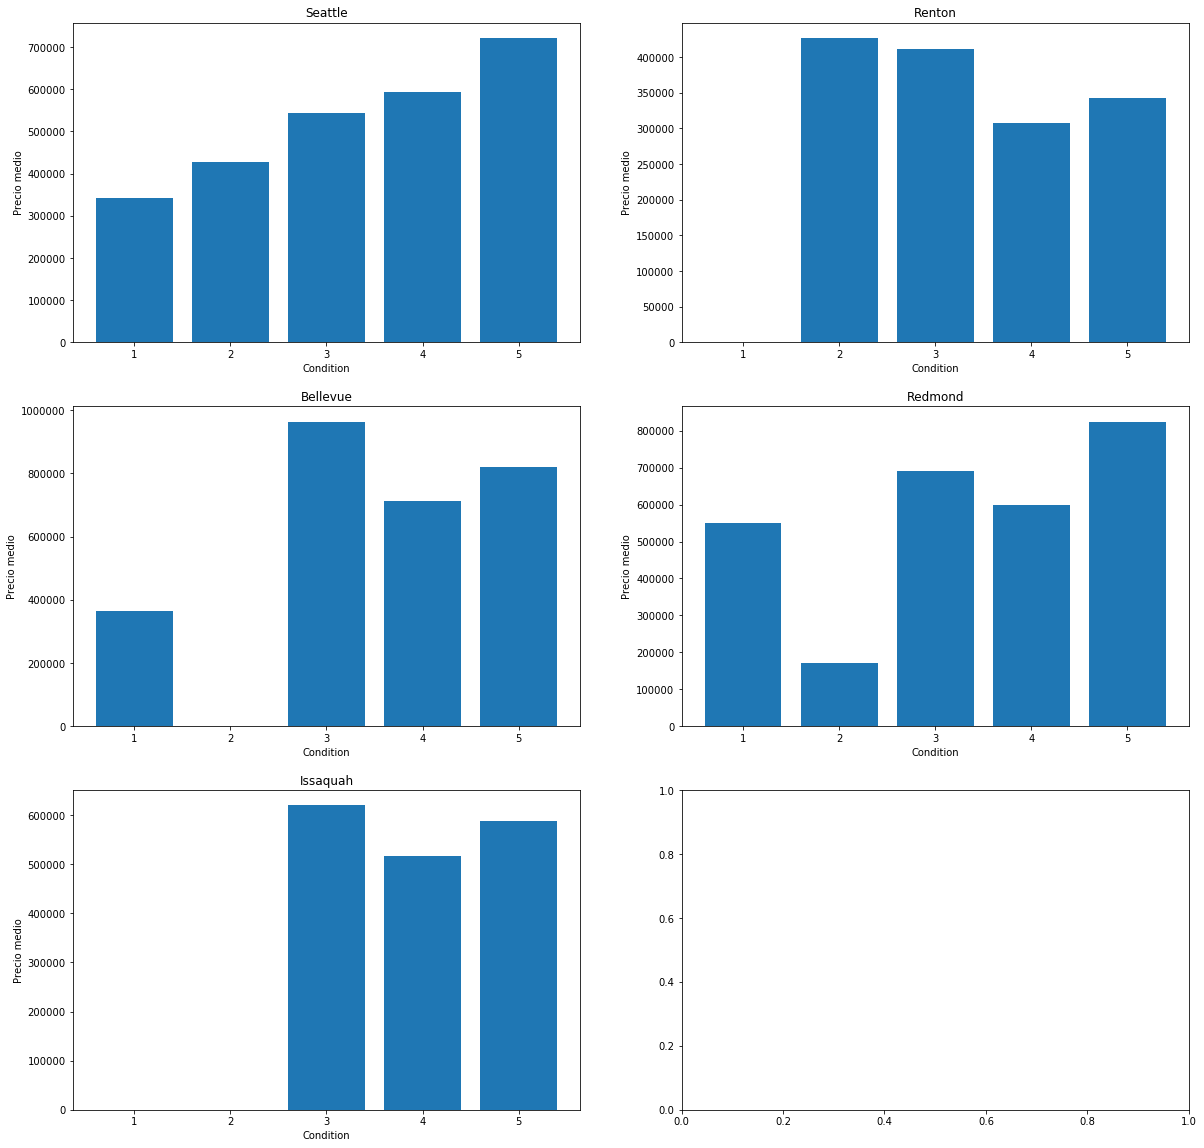

In [58]:
cities = ["Seattle", "Renton", "Bellevue", "Redmond", "Issaquah"]

fig, ax = plt.subplots(nrows=3, ncols = 2, figsize = (20,20))

i,j = 0,0

for c in cities:
    ax[i,j].bar(x = agr.index, height = agr[c].values)
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('Condition')
    ax[i,j].set_ylabel('Precio medio')
    j+=1
    if j == 2:
        i+=1
        j=0

## Lección 5 - Leyendas

La leyenda, aunque no lo parezca, es una parte muy importante en cualquier gráfico. Al fin y al cabo, nos muestra qué es lo que estamos representando. En las lecciones anteriores hemos visto como mostrar esa leyenda, pero ahora, vamos a profundizar y personalizarlas.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('./data')

%matplotlib inline

In [60]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Vamos a aprovechar el mismo gráfico de la lección anterior.

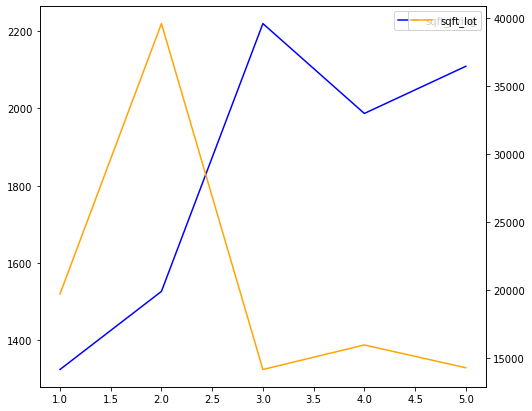

In [65]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

ax.legend()
ax1.legend()

Podemos indicar la situación de las leyendas para que no se pisen

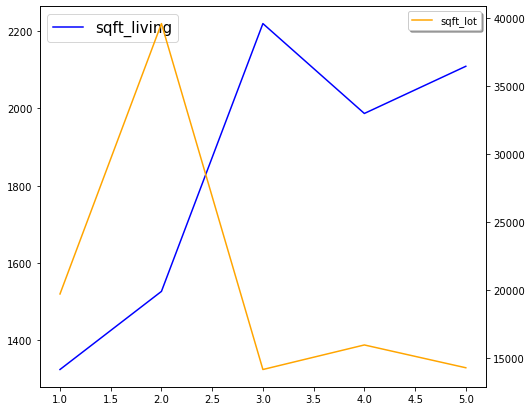

In [103]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

ax.legend(loc = 'upper left', fontsize = 15)
ax1.legend(loc = 'upper right', shadow = True, )

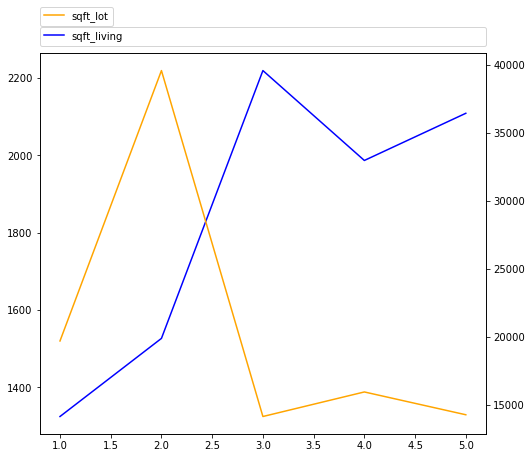

In [99]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper left',
           ncol=2, mode=None, borderaxespad=0.)

Podemos personalizar la leyenda con *mpatches*

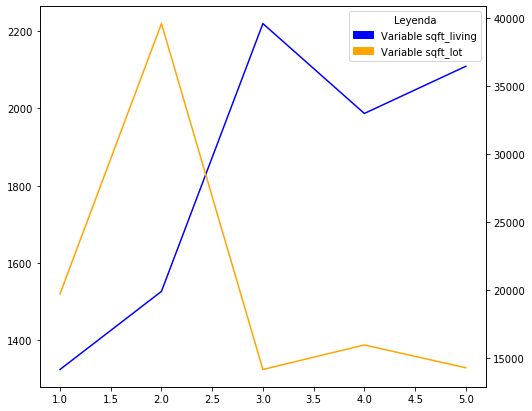

In [104]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

sqft_living = mpatches.Patch(color='blue', label='Variable sqft_living')
sqft_lot = mpatches.Patch(color='orange', label='Variable sqft_lot')
plt.legend(handles=[sqft_living, sqft_lot], title = 'Leyenda')

## Lección 6 - Imágenes

In [231]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Anyadimos este import
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('./data')

%matplotlib inline

Vamos a leer una imagen PNG, que como podréis ver, no deja de ser una matriz numérica 

In [232]:
image = mpimg.imread("""https://raw.githubusercontent.com/tphinkle/tphinkle.github.io/master/images/2017-8-15/mnist_0.png""")
print(image)

[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [233]:
image.shape

(311, 310, 4)

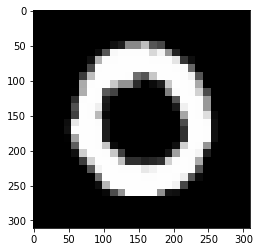

In [234]:
imgplot = plt.imshow(image)

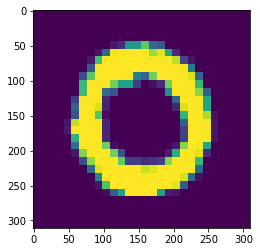

In [235]:
lum_img = image[:, :, 1]
plt.imshow(lum_img)

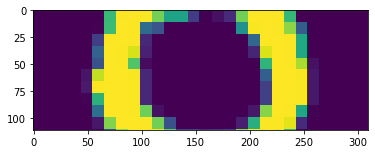

In [236]:
lum_img = image[100:-100, :, 1]
plt.imshow(lum_img)

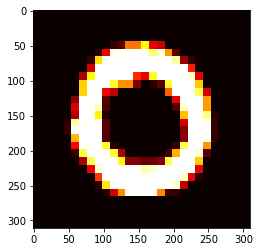

In [237]:
lum_img = image[:, :, 1]
plt.imshow(lum_img, cmap="hot")

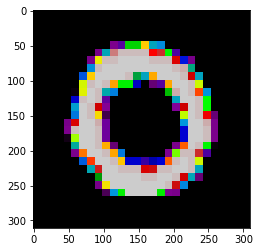

In [238]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

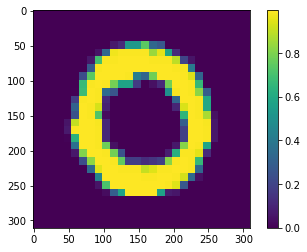

In [239]:
imgplot = plt.imshow(lum_img)
plt.colorbar()